<a href="https://colab.research.google.com/github/abhinav-syl/sales_anomaly/blob/main/Sales_anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the desired libraries**

In [ ]:
import pandas as pd
import csv
import os
import random
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing

Select and store data from the csv file


In [ ]:
def get_data(path): 
 list_row=[]
 date=[]
 traffic=[]
 order=[]
 url=[]
 with open(path,'r') as file:
  reader = csv.reader(file)
  for row in reader:
    if row[0]!='Date':
     traffic.append(row[2])
     order.append(row[3])
     if row[0] not in date:
       date.append(row[0])     
     if row[1] not in url:
       url.append(row[1])
     #print(row)
     list_row.append(row)
 #print(date)
 #print(url)
 #print(traffic)
 #print(order)
 #print(len(traffic))
 return list_row,date,url,traffic,order

In [ ]:
list_row,date,url,traffic,order = get_data('/content/submission.csv')
print(date)
print(url)
print(traffic)
print(order)

['1/1/2015', '2/1/2015', '3/1/2015', '4/1/2015', '5/1/2015', '6/1/2015', '7/1/2015', '8/1/2015', '9/1/2015', '10/1/2015', '11/1/2015', '12/1/2015', '13/1/2015', '14/1/2015', '15/1/2015', '16/1/2015', '17/1/2015', '18/1/2015', '19/1/2015', '20/1/2015', '21/1/2015', '22/1/2015', '23/1/2015', '24/1/2015', '25/1/2015', '26/1/2015', '27/1/2015', '28/1/2015', '29/1/2015', '30/1/2015', '31/1/2015', '1/2/2015', '2/2/2015', '3/2/2015', '4/2/2015', '5/2/2015', '6/2/2015', '7/2/2015', '8/2/2015', '9/2/2015', '10/2/2015', '11/2/2015', '12/2/2015', '13/2/2015', '14/2/2015', '15/2/2015', '16/2/2015', '17/2/2015', '18/2/2015', '19/2/2015', '20/2/2015', '21/2/2015', '22/2/2015', '23/2/2015', '24/2/2015', '25/2/2015', '26/2/2015', '27/2/2015', '28/2/2015', '1/3/2015', '2/3/2015', '3/3/2015', '4/3/2015', '5/3/2015', '6/3/2015', '7/3/2015', '8/3/2015', '9/3/2015', '10/3/2015', '11/3/2015', '12/3/2015', '13/3/2015', '14/3/2015', '15/3/2015', '16/3/2015', '17/3/2015', '18/3/2015', '19/3/2015', '20/3/2015',

Add additional dates to the existing ones


In [ ]:
def calendar(date):
 d1=[]
 m1=[]
 y1=[]
 for i in date:
   a = i.split('/')
   if a[0] not in d1:
     d1.append(a[0])
   if a[1] not in m1:
     m1.append(a[1])
   if a[2] not in y1:
     y1.append(a[2])
 m2={'1':31,'2':28,'3':31,'4':30,'5':31,'6':30,'7':31,'8':31,'9':30,'10':31,'11':30,'12':31}

 y1.append('2020')
 y1.append('2021')
 date=[]
 for i in y1:
   for j in m2:
     len = m2[j]
     if (int(i)%4)==0 and j=='2':
       len=29
     for k in range(1,len+1):
       temp = str(k)+'/'+j+'/'+i
       date.append(temp)
 return date,y1,m1,d1

In [ ]:
date,year_all,month_all,date_all = calendar(date)
print(date)
print(year_all)
print(month_all)
print(date_all)

['1/1/2015', '2/1/2015', '3/1/2015', '4/1/2015', '5/1/2015', '6/1/2015', '7/1/2015', '8/1/2015', '9/1/2015', '10/1/2015', '11/1/2015', '12/1/2015', '13/1/2015', '14/1/2015', '15/1/2015', '16/1/2015', '17/1/2015', '18/1/2015', '19/1/2015', '20/1/2015', '21/1/2015', '22/1/2015', '23/1/2015', '24/1/2015', '25/1/2015', '26/1/2015', '27/1/2015', '28/1/2015', '29/1/2015', '30/1/2015', '31/1/2015', '1/2/2015', '2/2/2015', '3/2/2015', '4/2/2015', '5/2/2015', '6/2/2015', '7/2/2015', '8/2/2015', '9/2/2015', '10/2/2015', '11/2/2015', '12/2/2015', '13/2/2015', '14/2/2015', '15/2/2015', '16/2/2015', '17/2/2015', '18/2/2015', '19/2/2015', '20/2/2015', '21/2/2015', '22/2/2015', '23/2/2015', '24/2/2015', '25/2/2015', '26/2/2015', '27/2/2015', '28/2/2015', '1/3/2015', '2/3/2015', '3/3/2015', '4/3/2015', '5/3/2015', '6/3/2015', '7/3/2015', '8/3/2015', '9/3/2015', '10/3/2015', '11/3/2015', '12/3/2015', '13/3/2015', '14/3/2015', '15/3/2015', '16/3/2015', '17/3/2015', '18/3/2015', '19/3/2015', '20/3/2015',

Assign Holidays

In [ ]:
def holiday_calendar():
 holiday=[]
 for i in year_all:
  a = "/15/8/" +i
  holiday.append(a)
  b = '26/1/'+i
  holiday.append(b) 
  b = '14/11/'+i
  holiday.append(b)
  b = '26/10/'+i
  holiday.append(b)
  b = '1/1/'+i
  holiday.append(b)
  b = '3/3/'+i
  holiday.append(b)
 return holiday

In [ ]:
holiday = holiday_calendar()
print(holiday)

['/15/8/2015', '26/1/2015', '14/11/2015', '26/10/2015', '1/1/2015', '3/3/2015', '/15/8/2016', '26/1/2016', '14/11/2016', '26/10/2016', '1/1/2016', '3/3/2016', '/15/8/2017', '26/1/2017', '14/11/2017', '26/10/2017', '1/1/2017', '3/3/2017', '/15/8/2018', '26/1/2018', '14/11/2018', '26/10/2018', '1/1/2018', '3/3/2018', '/15/8/2019', '26/1/2019', '14/11/2019', '26/10/2019', '1/1/2019', '3/3/2019', '/15/8/2020', '26/1/2020', '14/11/2020', '26/10/2020', '1/1/2020', '3/3/2020', '/15/8/2021', '26/1/2021', '14/11/2021', '26/10/2021', '1/1/2021', '3/3/2021']


Add the Day to each date

In [ ]:
def date_to_day(list_row):
 week=['mon','tues','wed','thur','fri','sat','sun']
 count=3
 day={}
 for i in date:
   if count==7:
     count=0
   day[i]=week[count]
   count=count+1
 for row in list_row:
   if row[0] in holiday:
     row.append(1)
   else:
     row.append(0)
   row.append(day[row[0]])
 return day,list_row,week  

In [ ]:
day,list_row,week = date_to_day(list_row)

In [ ]:
print(day)
print(list_row[0:10])

{'1/1/2015': 'thur', '2/1/2015': 'fri', '3/1/2015': 'sat', '4/1/2015': 'sun', '5/1/2015': 'mon', '6/1/2015': 'tues', '7/1/2015': 'wed', '8/1/2015': 'thur', '9/1/2015': 'fri', '10/1/2015': 'sat', '11/1/2015': 'sun', '12/1/2015': 'mon', '13/1/2015': 'tues', '14/1/2015': 'wed', '15/1/2015': 'thur', '16/1/2015': 'fri', '17/1/2015': 'sat', '18/1/2015': 'sun', '19/1/2015': 'mon', '20/1/2015': 'tues', '21/1/2015': 'wed', '22/1/2015': 'thur', '23/1/2015': 'fri', '24/1/2015': 'sat', '25/1/2015': 'sun', '26/1/2015': 'mon', '27/1/2015': 'tues', '28/1/2015': 'wed', '29/1/2015': 'thur', '30/1/2015': 'fri', '31/1/2015': 'sat', '1/2/2015': 'sun', '2/2/2015': 'mon', '3/2/2015': 'tues', '4/2/2015': 'wed', '5/2/2015': 'thur', '6/2/2015': 'fri', '7/2/2015': 'sat', '8/2/2015': 'sun', '9/2/2015': 'mon', '10/2/2015': 'tues', '11/2/2015': 'wed', '12/2/2015': 'thur', '13/2/2015': 'fri', '14/2/2015': 'sat', '15/2/2015': 'sun', '16/2/2015': 'mon', '17/2/2015': 'tues', '18/2/2015': 'wed', '19/2/2015': 'thur', '2

## **Plotting graph for company 0 for year 2016**

In [ ]:
def to_graph(url_name):
 list0=[]
 listt=[]
 listd=[]
 for i in list_row:
   if i[1]==url_name:
    list0.append(i)
    listt.append(int(i[2]))
    listd.append(i[0])
 return listt,listd

In [ ]:
listt,listd = to_graph('google.com/nlp/0/')

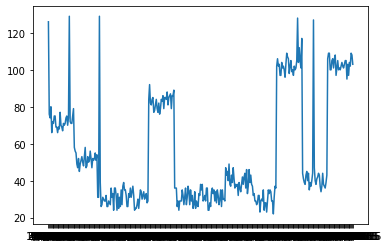

In [ ]:
plt.plot(listd[0:365], listt[0:365])
plt.show()

In [ ]:
def max(list1):
  maximus=0
  for i in list1:
    if int(i)>maximus:
      maximus=int(i)
  return maximus

In [ ]:
max1= max(traffic)
print(max1)

174


Dividing the traffic and order columns by max value

In [ ]:
def pre_process(max,list_row):
 for i in range(0,len(list_row)):
   list_row[i][2] = int(list_row[i][2])/max
   list_row[i][3] = int(list_row[i][3])/max
 return list_row

In [ ]:
list_row = pre_process(max1,list_row)
print(list_row[0:10])

[['1/1/2015', 'google.com/nlp/0/', 0.7241379310344828, 0.10919540229885058, 1, 'thur'], ['1/1/2015', 'google.com/nlp/1/', 0.6609195402298851, 0.3333333333333333, 1, 'thur'], ['1/1/2015', 'google.com/nlp/2/', 0.7068965517241379, 0.12643678160919541, 1, 'thur'], ['1/1/2015', 'google.com/nlp/3/', 0.7241379310344828, 0.11494252873563218, 1, 'thur'], ['1/1/2015', 'google.com/nlp/4/', 0.6149425287356322, 0.46551724137931033, 1, 'thur'], ['1/1/2015', 'google.com/nlp/5/', 0.7126436781609196, 0.6264367816091954, 1, 'thur'], ['1/1/2015', 'google.com/nlp/6/', 0.6551724137931034, 0.10919540229885058, 1, 'thur'], ['1/1/2015', 'google.com/nlp/7/', 0.7126436781609196, 0.6781609195402298, 1, 'thur'], ['1/1/2015', 'google.com/nlp/8/', 0.7298850574712644, 0.06321839080459771, 1, 'thur'], ['1/1/2015', 'google.com/nlp/9/', 0.7183908045977011, 0.08045977011494253, 1, 'thur']]


In [ ]:
def number_to_one_hot(list1):
  listi=[]
  for i in range(0,len(list1)):
    listi.append(i)
  one_hot = keras.utils.to_categorical(listi)
  dictf={}
  count=0
  for i in listi:
    code = one_hot[i]
    ind = list1[count]
    dictf[ind] = code
    count = count+1
  return dictf

Defining Seasonality

In [ ]:
season=['winter','summer','autumn','spring','rainy']
def cur_season(season,date):
  sess= number_to_one_hot(season)
  d = date.split('/')
  w = ['11','12','1']
  a=0
  s = ['5','6','7','8']
  sp = ['2','3','4']
  aut = ['10']
  ra = ['9']
  if d[1] in w:
    a= sess['winter']
  if d[1] in s:
    a= sess['summer']
  if d[1] in sp:
    a= sess['spring']
  if d[1] in aut:
    a= sess['autumn']
  if d[1] in ra:
    a= sess['rainy']
  return a

In [ ]:
url_enc = number_to_one_hot(url)
print(url_enc)
print(len(url_enc))


{'google.com/nlp/0/': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 'google.com/nlp/1/': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 'google.com/nlp/2/': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 'google.com/nlp/3/': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.

Encoding Dates

In [ ]:
def date_enc(date):
  days=[]
  months=[]
  years=[]
  final={}
  count=0
  for i in date:
    datess = i.split("/")
    if int(datess[0]) not in days:
      days.append(int(datess[0]))
    if int(datess[1]) not in months:
      months.append(int(datess[1]))
    if int(datess[2]) not in years:
      years.append(int(datess[2]))
  day_enc = number_to_one_hot(days)
  month_enc = number_to_one_hot(months)
  count=0
  last_year = int(years[-1])+1
  years.append(last_year)
  #print(days,months,years)
  years_enc = number_to_one_hot(years)
  #print("year_enc=",years_enc)
  count=0
  #print(years)
  #print(len(dates_enc),len(months_enc),years_enc)
  return day_enc,month_enc,years_enc

In [ ]:
days,months,years = date_enc(date)
print(days)
print(months)
print(years)

{1: array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 2: array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 3: array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 4: array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 5: array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 6: array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 7: array([0., 0

In [ ]:
def date_to_enc(date,days,months,years):
  dates = date.split("/")
  day = days[int(dates[0])]
  month = months[int(dates[1])]
  year = years[int(dates[2])]
  return day,month,year

Converting Data into inputs

In [ ]:
def conversion(week,days,months,years,url_enc,list_row):
  inp_day = []
  inp_mon = []
  inp_year = []
  inp_url=[]
  inp_week=[]
  inp_hol=[]
  out = []
  week1 = number_to_one_hot(week)
  count=0
  for row in list_row:
       #print(row[0])
       d = row[0]
       d_split=d.split('/')
       if d_split[2]==str(year_all[0]):
         continue
       #print(d)
       d1,m1,y1 = date_to_enc(d,days,months,years)
       inp_day.append(d1)
       inp_mon.append(m1)
       inp_year.append(y1)
       u = url_enc[row[1]]
       inp_url.append(u)
       week2 = week1[row[5]]
       inp_week.append(week2)
       t1 = row[2]
       inp_hol.append([row[4]])
       #for i in range(0,len(o)):
       #  b[i+len(t)] = t[i]
       out.append(t1)
       count = count+1
  return inp_day,inp_mon,inp_year,inp_url,inp_week,inp_hol,out

In [ ]:
inp_day,inp_mon,inp_year,inp_url,inp_week,inp_hol,out = conversion(week,days,months,years,url_enc,list_row)
inp_day = np.array(inp_day)
inp_mon = np.array(inp_mon)
inp_year = np.array(inp_year)
inp_url = np.array(inp_url)
inp_week = np.array(inp_week)
inp_hol = np.array(inp_hol)
#inp = inp1.reshape((inp1.shape[0],1,inp1.shape[1]))
#inp = inp.reshape((inp.shape[0],1,inp.shape[1]))
print(inp_day.shape)
print(inp_day.dtype)
print(inp_mon.shape)
print(inp_year.shape)
print(inp_url.shape)
print(inp_url.dtype)
print(inp_week.shape)
print(inp_hol.shape)
out = np.array(out)
print(out.dtype)
print(out.shape)

(73000, 31)
float32
(73000, 12)
(73000, 8)
(73000, 50)
float32
(73000, 7)
(73000, 1)
float64
(73000,)


Defining Date pattern for remaining inputs

In [ ]:
def d_input(date):
 dates_input = {}
 for i in date:
  d = i
  d_split=d.split('/')
  if d_split[2]==str(year_all[0]):
    continue
  #print('date=',d)
  ind = date.index(d)
  temp=[]
  #print(ind)
  last = url
  for i in range(1,8):
    last = date[ind-i]
    #print(last)
    temp.append(last)
  dates1=[]
  dates2=[]
  dates3=[]
  dates7=[]
  date_prev=[]
  d1 = temp[0]
  d2 = temp[0:2]
  d3 = temp[0:3]
  d7 = temp[0:7]
  d_last = d_split[0]+'/'+d_split[1]+'/'+str(int(d_split[2])-1)
  #print('1=',d1)
  #print('2=',d2)
  #print('3=',d3)
  #print('7=',d7)
  #print('last=',d_last)
  #print(temp)
  dates1.append(d1)
  dates2.append(d2)
  dates3.append(d3)
  dates7.append(d7)
  date_prev.append(d_last)
  list_temp=[]
  list_temp.append([dates1,dates2,dates3,dates7,date_prev])
  dates_input[d] = list_temp
 return dates_input

In [ ]:
dates_input = d_input(date)

**Processing the sales data for neighbouring dates as input**

In [ ]:
def other_inputs(season):
 inp1=[]
 inp2=[]
 inp3=[]
 inp7=[]
 inp_prev=[]
 inp_sess=[]
 count=0
 for row in list_row:
  ind = count
  count=count+1
  d = row[0]
  d_split=d.split('/')
  if d_split[2]==str(year_all[0]):
    continue
  sess = cur_season(season,d)
  inp_sess.append(sess)
  d_prev = dates_input[d]
  d1 = d_prev[0][0]
  #print(d1)
  d2 = d_prev[0][1]
  d3 = d_prev[0][2]
  d7 = d_prev[0][3]
  d_year = d_prev[0][4]
  #print(d_year)
  u = row[1]
  t1=[]
  t2=[]
  t3=[]
  t7=[]
  t_prev=[]
  t_prev.append(list_row[ind-365*len(url)][2])
  for i in list_row[ind-400:ind]:
    #print('yo')
    if i[1]== u:
      if i[0]==d1[0]:
        #print(i[1])
        t1.append(i[2])
      for j in d2[0]:
        if i[0]==j:
          t2.append(i[2])
      for j in d3[0]:
        if i[0]==j:
          t3.append(i[2])
      for j in d7[0]:
        if i[0]==j:
          t7.append(i[2])
  if len(t1)!=1:
    t1.append(0)
  for j in range(0,7):
     if len(t7)!=7:
       t7.append(0)
  for j in range(0,2):
     if len(t2)!=2:
       t2.append(0)
  for j in range(0,3):
    if len(t3)!=3:
      t3.append(0)
  if len(t_prev)!=1:
    t_prev.append(0)
  inp1.append(t1)
  inp2.append(t2)
  inp3.append(t3)
  inp7.append(t7)
  inp_prev.append(t_prev)
 return inp1,inp2,inp3,inp7,inp_prev,inp_sess

In [ ]:
inp1,inp2,inp3,inp7,inp_prev,inp_sess = other_inputs(season)
inp1 = np.array(inp1)
print(inp1.shape)
inp2 = np.array(inp2)
inp2= inp2.reshape(inp2.shape[0],inp2.shape[1],1)
print(inp2.shape)
inp3 = np.array(inp3)
inp3= inp3.reshape(inp3.shape[0],inp3.shape[1],1)
print(inp3.shape)
inp7 = np.array(inp7)
inp7= inp7.reshape(inp7.shape[0],inp7.shape[1],1)
print(inp7.shape)
inp_prev = np.array(inp_prev)
print(inp_prev.shape)
inp_sess = np.array(inp_sess)
print(inp_sess.shape)

(73000, 1)
(73000, 2, 1)
(73000, 3, 1)
(73000, 7, 1)
(73000, 1)
(73000, 5)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense,LSTM,Flatten
from tensorflow.keras.layers import concatenate
# This returns a tensor
input_day = Input(shape=(inp_day.shape[1],),name = 'input_day')
input_mon = Input(shape=(inp_mon.shape[1],),name = 'input_mon')
input_year = Input(shape=(inp_year.shape[1],),name = 'input_year')
input_url = Input(shape=(inp_url.shape[1],),name = 'input_url')
input_week = Input(shape=(inp_week.shape[1],),name = 'input_week')
input_hol = Input(shape=(inp_hol.shape[1],),name = 'input_hol')
input_day1 = Input(shape=(inp1.shape[1],),name = 'input_day1')
input_day2 = Input(shape=(inp2.shape[1],inp2.shape[2]),name = 'input_day2')
input_day3 = Input(shape=(inp3.shape[1],inp3.shape[2]),name = 'input_day3')
input_day7 = Input(shape=(inp7.shape[1],inp7.shape[2]),name = 'input_day7')
input_day_prev = Input(shape=(inp_prev.shape[1],),name = 'input_day_prev')
input_day_sess = Input(shape=(inp_sess.shape[1],),name = 'input_day_sess')
# A layer instance is callable on a tensor, and returns a tensor
x1 = Dense(5, activation='relu')(input_day)
x2 = Dense(5, activation='relu')(input_mon)
x3 = Dense(5, activation='relu')(input_year)
x4 = Dense(5, activation='relu')(input_url)
x5 = Dense(5, activation='relu')(input_week)
x6 = Dense(5, activation='relu')(input_hol)
x7 = Dense(5, activation='relu')(input_day1)
x_8 = Dense(5, activation='relu')(input_day2)
x__8 = LSTM(5,return_sequences=True)(x_8)
x8 = Flatten()(x__8)
x_9 = Dense(5, activation='relu')(input_day3)
x__9 = LSTM(5,return_sequences=True)(x_9)
x9 = Flatten()(x__9)
x_10 = Dense(5, activation='relu')(input_day7)
x__10 = LSTM(5,return_sequences=True)(x_10)
x10 = Flatten()(x__10)
x11 = Dense(5, activation='relu')(input_day_prev)
x12 = Dense(5, activation='relu')(input_day_sess)
c = concatenate([x1, x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12])
layer1 = Dense(64,activation='relu')(c)
outputs = Dense(1, activation='sigmoid')(layer1)
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=[input_day,input_mon,input_year,input_url,input_week,input_hol,input_day1,input_day2,input_day3,input_day7,input_day_prev,input_day_sess], outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_day2 (InputLayer)         [(None, 2, 1)]       0                                            
__________________________________________________________________________________________________
input_day3 (InputLayer)         [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
input_day7 (InputLayer)         [(None, 7, 1)]       0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 2, 5)         10          input_day2[0][0]                 
______________________________________________________________________________________________

In [ ]:
#model  = tf.keras.models.Functional([
#     tf.keras.layers.Dense(32,activation="relu",input_shape = (1,100)),
#     tf.keras.layers.LSTM(32),
     #tf.keras.layers.Dense(64,activation="relu"),
     #tf.keras.layers.Dense(32,activation="relu"),
     #tf.keras.layers.Dropout(0.01),
     #tf.keras.layers.Dense(101,activation="softmax")
#])
#model.summary()

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss=['mean_squared_error'],
              optimizer = 'adam',
              metrics = ['acc']
              )

In [ ]:
history = model.fit(
           x = [inp_day,inp_mon,inp_year,inp_url,inp_week,inp_hol,inp1,inp2,inp3,inp7,inp_prev,inp_sess],
           y = out,
           batch_size=16,
           steps_per_epoch=1000,
           epochs = 30,
           verbose=1,
           shuffle =False
           )

Epoch 1/30
1000/1000 [==============================] - 18s 11ms/step - loss: 0.0086 - acc: 0.0000e+00
Epoch 2/30
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0035 - acc: 0.0000e+00
Epoch 3/30
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0018 - acc: 0.0000e+00
Epoch 4/30
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0011 - acc: 0.0000e+00
Epoch 5/30
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0031 - acc: 0.0000e+00
Epoch 6/30
1000/1000 [==============================] - 11s 11ms/step - loss: 9.1825e-04 - acc: 0.0000e+00
Epoch 7/30
1000/1000 [==============================] - 11s 11ms/step - loss: 8.4594e-04 - acc: 0.0000e+00
Epoch 8/30
1000/1000 [==============================] - 11s 11ms/step - loss: 7.9022e-04 - acc: 0.0000e+00
Epoch 9/30
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0012 - acc: 0.0000e+00
Epoch 10/30
1000/1000 [==============================] - 11s 

In [ ]:
def testing(date,url_name,traffic,order,maxj):
       out=[]
       ans=0
       for i in list_row:
         if i[0]==date and i[1]==url_name:
           ans=1
       if ans==0:
         list_row.append([date,url_name,traffic,order])
         print(ans)
       d1,d2,d3 = date_to_enc(date,days,months,years)
       #print(da)
       #print(d[0])
       print('date=',date)
       #print(inp[0][count])
       #print(count)
       us = url_enc[url_name]
       us = np.array([us])
       #t1 = int(traffic/maxj)
       d1 = np.array([d1])
       #print(d1.shape)
       d2 = np.array([d2])
       d3 = np.array([d3])
       #print(d2.shape)
       #print(d3.shape)
       #print(us.shape)
       week1 = number_to_one_hot(week)
       week2 = week1[day[date]]
       #print(day[date])
       week2=np.array([week2])
       #print(week2)
       #print("date=",date)
       if date in holiday:
         h=1
         #print('holiday')
       else:
         h=0
         #print("no holiday")
       h = np.array([h])
       #print(h)
       count=-1
       ind=0
       #print(date)
       #print(us)
       for i in list_row:
         count =count+1
         #print(count)
         #print(i[0],i[1])
         #print(date,us)
         if i[0]==date and i[1]==url_name:
           #print("found")
           ind = count
       print("ind=",ind)
       sess = cur_season(season,date)
       #print(sess)
       d_prev = dates_input[date]
       #print(d_prev)
       d11 = d_prev[0][0]
       #print(d1)
       d22 = d_prev[0][1]
       d33 = d_prev[0][2]
       d7 = d_prev[0][3]
       d_year = d_prev[0][4]
       t1=[]
       t2=[]
       t3=[]
       t7=[]
       t_prev=[]
       t_prev.append(list_row[ind-365*len(url)][2])
       #print(list_row[ind-366*len(url)])
       #print(list_row[ind-365*len(url)])
       print("t-prev",t_prev)
       for i in list_row[ind-400:ind+1]:
          #print('yo')
          if i[1]== url_name:
            if i[0]==d11[0]:
              #print(i[1])
               t1.append(i[2])
            for j in d22[0]:
              if i[0]==j:
                t2.append(i[2])
            for j in d33[0]:
              if i[0]==j:
                t3.append(i[2])
            for j in d7[0]:
              if i[0]==j:
                t7.append(i[2])
       if len(t1)!=1:
          t1.append(0)
       for j in range(0,7):
          if len(t7)!=7:
            t7.append(0)
       for j in range(0,2):
         if len(t2)!=2:
           t2.append(0)
       for j in range(0,3):
         if len(t3)!=3:
          t3.append(0)
       if len(t_prev)!=1:
         t_prev.append(0)
       t1 = np.array([t1])
       print('t1=',t1)
       t2 = np.array([t2])
       print('t2=',t2)
       t3 = np.array([t3])
       t3 = t3.reshape(1,3,1)
       print('t3=',t3)
       t7 = np.array([t7])
       t7 = t7.reshape(1,7,1)
       print('t7=',t7)
       t_prev = np.array([t_prev])
       print("prev=",t_prev)
       sess = np.array([sess])
       y_out = model.predict([d1,d2,d3,us,week2,h,t1,t2,t3,t7,t_prev,sess])
       print("output=",y_out)
       #print(y_out.shape)
       #print(list_row[ind])
       print("output after processing=",y_out[0][0]*maxj)
       #sales on the date
       print("sales on date=",list_row[ind][2]*maxj)
       e1 = y_out[0][0]*maxj- list_row[ind][2]*maxj
       print('change from expected value= ',e1)
       if (abs(e1)>50):
         print("anomaly")
       return y_out[0][0]*maxj

In [ ]:
a= testing('1/1/2016','google.com/nlp/0/',116,50,max1)

date= 1/1/2016
ind= 18250
t-prev [0.7241379310344828]
t1= [[0.59195402]]
t2= [[0.62068966 0.59195402]]
t3= [[[0.62643678]
  [0.62068966]
  [0.59195402]]]
t7= [[[0.59195402]
  [0.55747126]
  [0.59770115]
  [0.5862069 ]
  [0.62643678]
  [0.62068966]
  [0.59195402]]]
prev= [[0.72413793]]
output= [[0.73870635]]
output after processing= 128.53490495681763
sales on date= 131.0
change from expected value=  -2.465095043182373


In [ ]:
print(date)

['1/1/2015', '2/1/2015', '3/1/2015', '4/1/2015', '5/1/2015', '6/1/2015', '7/1/2015', '8/1/2015', '9/1/2015', '10/1/2015', '11/1/2015', '12/1/2015', '13/1/2015', '14/1/2015', '15/1/2015', '16/1/2015', '17/1/2015', '18/1/2015', '19/1/2015', '20/1/2015', '21/1/2015', '22/1/2015', '23/1/2015', '24/1/2015', '25/1/2015', '26/1/2015', '27/1/2015', '28/1/2015', '29/1/2015', '30/1/2015', '31/1/2015', '1/2/2015', '2/2/2015', '3/2/2015', '4/2/2015', '5/2/2015', '6/2/2015', '7/2/2015', '8/2/2015', '9/2/2015', '10/2/2015', '11/2/2015', '12/2/2015', '13/2/2015', '14/2/2015', '15/2/2015', '16/2/2015', '17/2/2015', '18/2/2015', '19/2/2015', '20/2/2015', '21/2/2015', '22/2/2015', '23/2/2015', '24/2/2015', '25/2/2015', '26/2/2015', '27/2/2015', '28/2/2015', '1/3/2015', '2/3/2015', '3/3/2015', '4/3/2015', '5/3/2015', '6/3/2015', '7/3/2015', '8/3/2015', '9/3/2015', '10/3/2015', '11/3/2015', '12/3/2015', '13/3/2015', '14/3/2015', '15/3/2015', '16/3/2015', '17/3/2015', '18/3/2015', '19/3/2015', '20/3/2015',

In [ ]:
def testmore(date_all,url_name,maxj):
  y=[]
  d=[]
  for i in range(365,730):
    print(i)
    print(date_all[i])
    y1 = testing(date_all[i],url_name,100,50,maxj)
    y.append(y1)
    d.append(date_all[i])
  return y,d

In [ ]:
test,dates = testmore(date,'google.com/nlp/0/',max1)

Streaming output truncated to the last 5000 lines.
  [0.47126437]]]
prev= [[0.47701149]]
output= [[0.4327802]]
output after processing= 75.30375587940216
sales on date= 76.0
change from expected value=  -0.6962441205978394
503
18/5/2016
date= 18/5/2016
ind= 25100
t-prev [0.4942528735632184]
t1= [[0.43678161]]
t2= [[0.47126437 0.43678161]]
t3= [[[0.48850575]
  [0.47126437]
  [0.43678161]]]
t7= [[[0.44827586]
  [0.49425287]
  [0.43678161]
  [0.47126437]
  [0.48850575]
  [0.47126437]
  [0.43678161]]]
prev= [[0.49425287]]
output= [[0.4409934]]
output after processing= 76.7328513264656
sales on date= 83.0
change from expected value=  -6.267148673534393
504
19/5/2016
date= 19/5/2016
ind= 25150
t-prev [0.4540229885057471]
t1= [[0.47701149]]
t2= [[0.43678161 0.47701149]]
t3= [[[0.47126437]
  [0.43678161]
  [0.47701149]]]
t7= [[[0.49425287]
  [0.43678161]
  [0.47126437]
  [0.48850575]
  [0.47126437]
  [0.43678161]
  [0.47701149]]]
prev= [[0.45402299]]
output= [[0.4226483]]
output after processi

In [ ]:
print(test)
print(dates)

[128.53490495681763, 72.39078944921494, 70.68393230438232, 71.89363521337509, 64.05031049251556, 66.29577040672302, 65.29722529649734, 67.23705607652664, 65.94877052307129, 62.255681812763214, 62.4967605471611, 64.62176924943924, 65.93395006656647, 65.30062186717987, 69.18395483493805, 66.27246111631393, 65.51805943250656, 64.56836271286011, 66.33834940195084, 66.0772334933281, 66.0744903087616, 67.57269430160522, 67.95373767614365, 65.51473027467728, 67.55304086208344, 127.75238692760468, 68.24527233839035, 67.05059731006622, 67.87480241060257, 68.46760511398315, 70.52491056919098, 48.98289996385574, 46.60680949687958, 45.18155139684677, 42.229096591472626, 41.01994854211807, 41.30972009897232, 39.87055939435959, 40.73044404387474, 42.201291382312775, 41.873519718647, 41.76502391695976, 43.478376030921936, 44.39400851726532, 44.955702781677246, 43.50387364625931, 43.62662208080292, 44.34251028299332, 43.78703874349594, 43.84795922040939, 44.662384271621704, 44.26767164468765, 43.17011

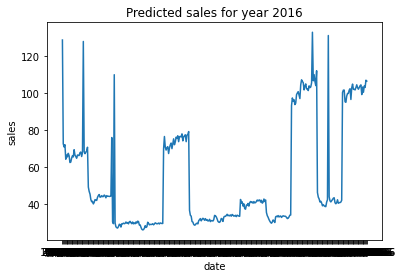

In [ ]:
plt.plot(dates,test)
plt.xlabel('date')
plt.ylabel('sales')
plt.title("Predicted sales for year 2016")
plt.show()

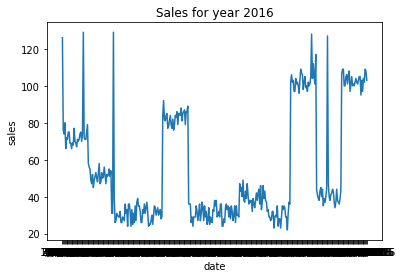

In [ ]:
plt.plot(listd[0:365], listt[0:365])
plt.xlabel('date')
plt.ylabel('sales')
plt.title("Sales for year 2016")
plt.show()

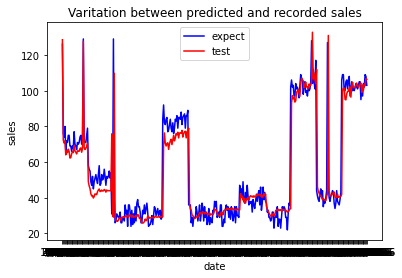

In [ ]:
plt.plot(dates,listt[0:365],color='b', label='expect')
plt.plot(dates,test,color='r', label='test')
plt.xlabel('date')
plt.ylabel('sales')
plt.title("Varitation between predicted and recorded sales")
plt.legend()
plt.show()